### Problemática:

¿Podemos encontrar relación entre los ingresos individuales con otras variables como nivel educativo, sexo, edad en la región Pampeana? ¿Se pueden establecer otras relaciones entre los comportamientos como comprar en cuotas o fiado u obtener préstamos?

### Variables:
Las variables a trabajar son:

| Nombre Tabla  | Descripción                |
|---------------|----------------------------|
| P47T          | Ingreso total ind. (mes)   |
| NIVEL_ED      | Nivel educativo alcanzado  |
| CH04          | Sexo                       |
| CH06          | Edad en años cumplidos     |
| V14           | Piden préstamos a personas |
| V15           | Piden préstamos a bancos   |
| V16           | Compran en cuotas o fiado  |
| ESTADO        | Condición de actividad     |

### Población total y muestra:
Este trabajo se basa en los datos provistos por la Encuesta Permanente de Hogares (EPH) correspondientes al tercer trimestre de 2024. Para este análisis se utilizaron tanto la base de datos de personas (individual) como la base de hogares, que fueron solapadas mediante el identificador común presente en ambas tablas (número de hogar y componente).
La población total a la que pertenecen estos datos es la población residente en la República Argentina, de acuerdo a la cobertura de la EPH. Esta población incluye tanto a personas económicamente activas como inactivas, y contempla diversos niveles educativos, edades y situaciones familiares.
Para el análisis se realizó un recorte geográfico, tomando únicamente los hogares y personas correspondientes a la región Pampeana, que abarca aglomerados urbanos en las provincias de Buenos Aires, Córdoba, Santa Fe, Entre Ríos y La Pampa.
La muestra analizada se compone de personas con ingresos individuales declarados, que además cuentan con información sobre sexo, edad, nivel educativo, y variables asociadas al comportamiento económico del hogar, como la compra en cuotas, al fiado, o el acceso a préstamos. Este enfoque permitió estudiar relaciones entre los ingresos individuales y diversas características sociodemográficas y de consumo dentro de la región Pampeana.

### Clasificar las variables elegidas.
| Variable                  | Tipo de variable       | Fuente (tabla)    |
|---------------------------|------------------------|-------------------|
| Ingreso individual        | Cuantitativa continua  | Base individual   |
| Edad                      | Cuantitativa continua  | Base individual   |
| Sexo                      | Cualitativa            | Base individual   |
| Nivel educativo           | Cualitativa ordinal    | Base individual   |
| Estado actividad          | Cualitativa            | Base individual   |
| Compra en cuotas          | Cualitativa            | Base de hogares   |
| Compra al fiado           | Cualitativa            | Base de hogares   |
| Préstamos solicitados     | Cualitativa            | Base de hogares   |

### Carga de datos de las encuestas

In [1]:
import pandas as pd

hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

##### Configuración de dependencias

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
personas_fil_pam = personas[personas['REGION'] == 43]

In [3]:
print("Longitud Tabla Personas:", len(personas))
print("Longitud Tabla Personas Filtrada:", len(personas_fil_pam))


Longitud Tabla Personas: 47564
Longitud Tabla Personas Filtrada: 14315


Se redujo el total de la tabla personas un 30%

In [7]:
personas_fil = personas_fil_pam[['CH04', 'CH06', 'P47T', 'NIVEL_ED' ,'REGION', 'CODUSU', 'ESTADO']]
personas_fil.head()

,CH04,CH06,P47T,NIVEL_ED,REGION,CODUSU,ESTADO
0,2,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,1
1,1,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,1
2,1,81,1750000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,1
3,2,78,400000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,3
4,1,65,1200000.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632,1


In [8]:
personas_fil.isnull().sum()

CH04         0
CH06         0
P47T        15
NIVEL_ED     0
REGION       0
CODUSU       0
ESTADO       0
dtype: int64

Encontramos que en la columna de Ingresos hay 15 filas nulas

In [9]:
personas_fil.describe()

,CH04,CH06,P47T,NIVEL_ED,REGION,ESTADO
count,14315.000000,14315.000000,1.430000e+04,14315.000000,14315.0,14315.000000
mean,1.519246,37.251764,2.953922e+05,3.748795,43.0,2.182676
std,0.499647,22.394482,4.934719e+05,1.774382,0.0,1.129003
min,1.000000,-1.000000,-9.000000e+00,1.000000,43.0,0.000000
25%,1.000000,18.000000,0.000000e+00,2.000000,43.0,1.000000
50%,2.000000,35.000000,0.000000e+00,4.000000,43.0,3.000000
75%,2.000000,55.000000,4.300000e+05,5.000000,43.0,3.000000
max,2.000000,102.000000,1.237000e+07,7.000000,43.0,4.000000


Hay un minimo de edad de -1 que no es lógico, y de ingresos -9. Y máximos en ingresos mensual marca como maximo $12.370.000 (puede ser correcto)

In [10]:
hogares_fil_pam = hogares[hogares['REGION'] == 43]
print("Longitud Tabla Hogares:", len(hogares))
print("Longitud Tabla Hogares Filtrada:", len(hogares_fil_pam))

Longitud Tabla Hogares: 16650
Longitud Tabla Hogares Filtrada: 5410


Se redujo el total de la tabla personas un 32%

In [11]:
hogares_fil = hogares_fil_pam[['V14', 'V15', 'V16','REGION', 'CODUSU' ]]

In [12]:
hogares_fil.head()

,V14,V15,V16,REGION,CODUSU
0,2,2,1,43,TQRMNOQVSHMMLOCDEFJAH00808791
1,2,2,1,43,TQRMNOPTQHKLLSCDEFJAH00866946
2,2,2,2,43,TQRMNORVTHMOLSCDEFJAH00808761
3,2,2,2,43,TQRMNORVVHMOLSCDEFJAH00866947
4,2,2,2,43,TQRMNOTPTHLNLRCDEFJAH00803474


In [13]:
hogares_fil.isnull().sum()


V14       0
V15       0
V16       0
REGION    0
CODUSU    0
dtype: int64

In [ ]:
hogares_fil.describe()

,V14,V15,V16,REGION
count,5410.000000,5410.000000,5410.000000,5410.0
mean,1.851386,1.891682,1.529575,43.0
std,0.370006,0.327041,0.509435,0.0
min,1.000000,1.000000,1.000000,43.0
25%,2.000000,2.000000,1.000000,43.0
50%,2.000000,2.000000,2.000000,43.0
75%,2.000000,2.000000,2.000000,43.0
max,9.000000,9.000000,9.000000,43.0


Hay errores de ingreso de datos al tener maximos en "9" cuando permite 1 o 2, en cuanto a comportamientos de consumo-prestamos.

In [ ]:
hogares_fil['V14'].value_counts()

2    4598
1     811
9       1
Name: V14, dtype: int64

Vemos una Fila con el valor 9 en la columna de prestamos a personas, por lo que se revisara cada estas variables

### Personas y Hogares región Pampeana

In [ ]:
df_final = pd.merge(personas_fil, hogares_fil, on=['CODUSU'], how='inner')

In [ ]:
df_final.isnull().sum()

CH04         0
CH06         0
P47T        15
NIVEL_ED     0
REGION_x     0
CODUSU       0
V14          0
V15          0
V16          0
REGION_y     0
dtype: int64

In [ ]:
df_final.head(15)

,CH04,CH06,P47T,NIVEL_ED,REGION_x,CODUSU,V14,V15,V16,REGION_y
0,2,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,2,2,1,43
1,1,33,-9.0,6,43,TQRMNOPTVHLOKRCDEFJAH00803557,2,2,1,43
2,1,81,1750000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,2,2,2,43
3,2,78,400000.0,6,43,TQRMNOQPRHKLKNCDEFJAH00868631,2,2,2,43
4,1,65,1200000.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
5,2,66,435600.0,4,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
6,1,30,1125000.0,5,43,TQRMNORVXHKLKNCDEFJAH00868632,2,1,1,43
7,1,63,-9.0,3,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43
8,2,60,0.0,3,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43
9,2,22,0.0,4,43,TQRMNQYTSHMOKQCDEFJAH00851671,2,2,2,43


En este caso vamos a tener que agrupar las columnas de personas para resumirlas y trabajarlas junto con los datos de hogares.

### Tablas de Referencia

#### ESTADO - Condición de Actividad
Tipo de variable: Nominal

In [23]:
estado = pd.DataFrame([(0, "Encuesta no realizada"), (1, "Ocupado"), (2, "Desocupado"), (3, "Inactivo"), (4, "Menor de 10 años")], columns=["ESTADO", "ESTADO_NOMBRE"])

##### Datos faltantes
No hay registros con valores indefinidos.

In [14]:
sum(personas_fil["ESTADO"].isna())

0

##### Análisis de Frecuencias

In [22]:
personas_fil.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()

ESTADO_NOMBRE
Ocupado                  6389
Inactivo                 5794
Menor de 10 años         1620
Desocupado                497
Encuesta no realizada      15
Name: count, dtype: int64

In [18]:
personas_fil.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts(normalize=True)

ESTADO_NOMBRE
Ocupado                  0.446315
Inactivo                 0.404750
Menor de 10 años         0.113168
Desocupado               0.034719
Encuesta no realizada    0.001048
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x746cf353d090>,
 [Text(0.2400365887314052, 1.4097100539012235, 'Ocupado'),
  Text(-0.8500255506619434, -1.1499376344923495, 'Inactivo'),
  Text(1.1959403305519825, -0.783981329981279, 'Menor de 10 años'),
  Text(1.4204464824824705, -0.16502057569641798, 'Desocupado'),
  Text(1.429992251792115, -0.00470742121724979, 'Encuesta no realizada')],
 [Text(0.17457206453193105, 1.0252436755645262, '44.63%'),
  Text(-0.6182004004814133, -0.8363182796307995, '40.48%'),
  Text(0.8697747858559872, -0.5701682399863847, '11.32%'),
  Text(1.0330519872599784, -0.12001496414284943, '3.47%'),
  Text(1.03999436493972, -0.003423579067090756, '0.10%')])

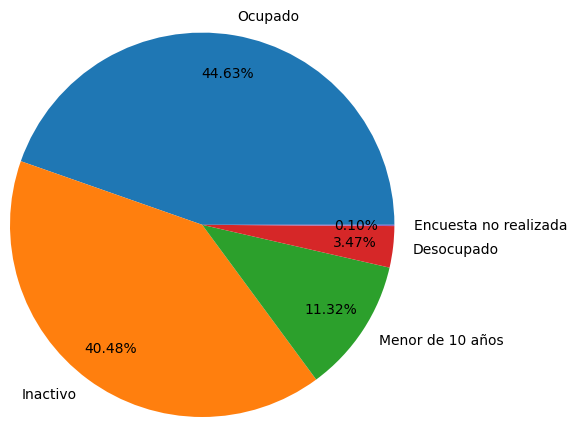

In [21]:
frecuencias = personas_fil.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()
plt.pie(frecuencias, labels=frecuencias.index, autopct="%.2f%%", pctdistance=0.8, labeldistance=1.1, radius=1.3)



#### NIVEL_ED - Nivel Educativo

Tipo de Variable: Ordinal


In [24]:
nivel_educativo = pd.DataFrame([
    (1, "Primario incompleto (incluye educación especial)"),
    (2, "Primario completo"),
    (3, "Secundario incompleto"),
    (4, "Secundario completo"),
    (5, "Superior universitario incompleto"),
    (6, "Superior universitario completo"),
    (7, "Sin instrucción"),
    (9, "Ns/Nr"),
    ], columns=["NIVEL_ED", "NIVEL_ED_NOMBRE"])



#### Datos faltantes

No hay registros con valores indefinidos.


In [25]:
sum(personas_fil["NIVEL_ED"].isna())

0

#### Análisis de Frecuencias

In [ ]:
personas_fil.merge(nivel_educativo, how="inner", on="NIVEL_ED")[["NIVEL_ED","NIVEL_ED_NOMBRE"]].value_counts()

NIVEL_ED  NIVEL_ED_NOMBRE                                 
4         Secundario completo                                 2965
3         Secundario incompleto                               2887
6         Superior universitario completo                     2156
1         Primario incompleto (incluye educación especial)    2016
5         Superior universitario incompleto                   1743
2         Primario completo                                   1672
7         Sin instrucción                                      876
Name: count, dtype: int64

In [27]:
personas_fil.merge(nivel_educativo, how="inner", on="NIVEL_ED")["NIVEL_ED_NOMBRE"].value_counts(normalize=True)

NIVEL_ED_NOMBRE
Secundario completo                                 0.207125
Secundario incompleto                               0.201677
Superior universitario completo                     0.150611
Primario incompleto (incluye educación especial)    0.140831
Superior universitario incompleto                   0.121760
Primario completo                                   0.116801
Sin instrucción                                     0.061195
Name: proportion, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Primario incompleto (incluye educación especial)'),
  Text(1, 0, 'Primario completo'),
  Text(2, 0, 'Secundario incompleto'),
  Text(3, 0, 'Secundario completo'),
  Text(4, 0, 'Superior universitario incompleto'),
  Text(5, 0, 'Superior universitario completo'),
  Text(6, 0, 'Sin instrucción')])

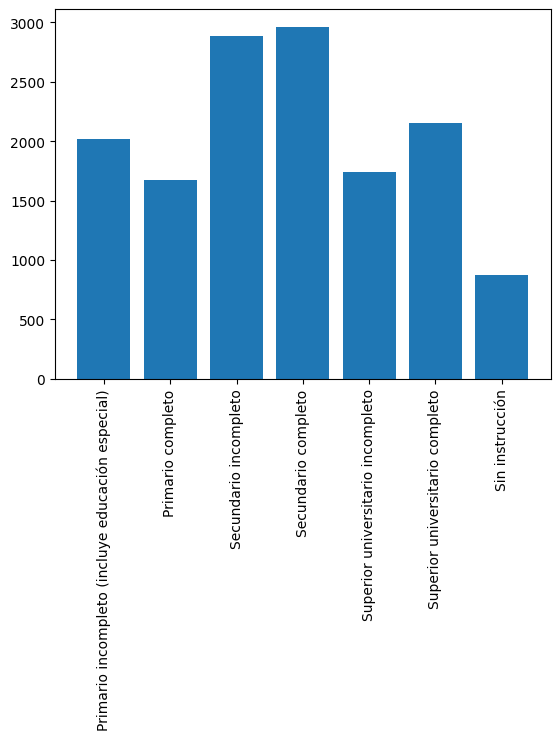

In [28]:
frecuencias = personas_fil.merge(nivel_educativo, how="inner", on="NIVEL_ED")[["NIVEL_ED","NIVEL_ED_NOMBRE"]].value_counts().reset_index(name='NIVEL_ED_COUNT').sort_values("NIVEL_ED")
plt.bar(frecuencias["NIVEL_ED_NOMBRE"], frecuencias["NIVEL_ED_COUNT"])
# frecuencias.reset_index(name='NIVEL_ED_COUNT').sort_values("NIVEL_ED")
# plt.bar(frecuencias.index, frecuencias)
plt.xticks(rotation=90)